In [8]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import warnings
from tqdm import tqdm
import seaborn as sns
random_state =537

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [9]:
test = pd.read_csv("/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/test.csv")
train = pd.read_csv("/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/train.csv")
sub = pd.read_csv("/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/sample_submission.csv")

In [10]:
"train:",train.shape,"test:",test.shape,train["MUSTERI_ID"].nunique(),test["MUSTERI_ID"].nunique()

('train:', (852719, 97), 'test:', (195631, 96), 852719, 195631)

In [11]:
train.FLAG.unique(),test.FLAG.unique()

(array(['HAZIRAN', 'MAYIS', 'EYLUL', 'EKIM', 'TEMMUZ', 'AGUSTOS'],
       dtype=object),
 array(['KASIM', 'ARALIK'], dtype=object))

In [12]:
label = "LABEL"
product_feat_cols = list(train.iloc[:,-42:-1].columns)
train[label].value_counts()

LABEL
UA      832770
HU14     10754
HU07      3728
HU06      3178
HU19       759
HU12       676
HU11       439
HU15       415
Name: count, dtype: int64

In [13]:
for i in product_feat_cols:
    print(i,":",train[train[i] != 0].shape[0])

BU01 : 39156
BU02 : 76214
BU03 : 5652
BU04 : 591
BU05 : 263
BU06 : 3
BU07 : 4314
BU08 : 78803
BU09 : 129734
BU10 : 35637
BU11 : 57965
BU12 : 9
BU13 : 36881
BU14 : 247
BU15 : 788
BU16 : 91077
BU17 : 150568
BU18 : 7392
BU19 : 34858
BU20 : 20492
BU21 : 3537
BU22 : 882
BU23 : 148853
BU24 : 24419
HU01 : 209
HU02 : 16
HU03 : 534
HU04 : 9309
HU05 : 3903
HU06 : 12324
HU07 : 5650
HU10 : 4098
HU11 : 1816
HU12 : 756
HU13 : 85
HU14 : 16420
HU15 : 656
HU16 : 321
HU17 : 7478
HU18 : 16914
HU19 : 5027


# Null Değerler

In [7]:
train.isna().sum()[train.isna().sum() != 0],"n_of_c:",len(train.isna().sum()[train.isna().sum() != 0]),"total:",train.isna().sum().sum()

(PP_MESLEK                      88620
 SORU_YATIRIM_KARAKTERI_CVP    720021
 SORU_YATIRIM_KARAKTERI_RG     720021
 SORU_MEDENI_HAL_CVP             1780
 SORU_MEDENI_HAL_RG              1780
 SORU_EGITIM_CVP               127095
 SORU_EGITIM_RG                127095
 SORU_GELIR_CVP                277902
 SORU_GELIR_RG                 277902
 SORU_COCUK_SAYISI_CVP         416560
 SORU_COCUK_SAYISI_RG          416560
 SON_AY_KATKI_MIKTARI          851739
 SON_AY_KATKI_ADET             851739
 SON_CEYREK_KATKI_MIKTARI      847099
 SON_CEYREK_KATKI_ADET         847099
 SON_SENE_KATKI_MIKTARI        837713
 SON_SENE_KATKI_ADET           837713
 dtype: int64,
 'n_of_c:',
 17,
 'total:',
 8248438)

In [8]:
test.isna().sum()[test.isna().sum() != 0],"n_of_c:",len(test.isna().sum()[test.isna().sum() != 0]),"total:",test.isna().sum().sum()

(PP_MESLEK                      26439
 IL                                 1
 SORU_YATIRIM_KARAKTERI_CVP    168244
 SORU_YATIRIM_KARAKTERI_RG     168244
 SORU_MEDENI_HAL_CVP              316
 SORU_MEDENI_HAL_RG               316
 SORU_EGITIM_CVP                27084
 SORU_EGITIM_RG                 27084
 SORU_GELIR_CVP                 79699
 SORU_GELIR_RG                  79699
 SORU_COCUK_SAYISI_CVP         113535
 SORU_COCUK_SAYISI_RG          113535
 SON_AY_KATKI_MIKTARI          195303
 SON_AY_KATKI_ADET             195303
 SON_CEYREK_KATKI_MIKTARI      193712
 SON_CEYREK_KATKI_ADET         193712
 SON_SENE_KATKI_MIKTARI        191885
 SON_SENE_KATKI_ADET           191885
 dtype: int64,
 'n_of_c:',
 18,
 'total:',
 1965996)

In [9]:
for i in product_feat_cols:
    print(i,":",train[i].unique())

BU01 : [1 0 2 4 3]
BU02 : [0 1 2 3 4 5 6]
BU03 : [0 1 2 3 4]
BU04 : [0 1 2 3 4]
BU05 : [0 1 2]
BU06 : [0 1]
BU07 : [0 1 2 3 6 5 4]
BU08 : [0 1 2 3 4 5 6 7 8]
BU09 : [ 0  1  3  2  4  5  6  7 11 12  8 13 17 10  9 36]
BU10 : [0 1 2 3 4 5 8 6]
BU11 : [ 0  1  2  3  4  5 11  8  6  7]
BU12 : [0 1]
BU13 : [ 0  1  2  3  5  6  4 11  7  8  9 12 22]
BU14 : [0 1 2 3 4]
BU15 : [0 1 2]
BU16 : [ 0  1  2  3  4  6  5 10 13  7  8 12]
BU17 : [ 0  1  2  3  4  6  7  5 11 10  9  8]
BU18 : [0 1 2 3 4 5]
BU19 : [ 0  1  3  2  4  5  8  6 10  7  9]
BU20 : [0 1 2 4 3 5 6 8]
BU21 : [0 1 2 3 4 5 8]
BU22 : [0 1 2 3 4]
BU23 : [0 1 2 3 4 5]
BU24 : [0 1 2 3 4]
HU01 : [ 0  1  2 10  5]
HU02 : [0 1]
HU03 : [0 1 3 2 5 4 9 8 6]
HU04 : [0 1 2]
HU05 : [0 2 1]
HU06 : [0 1 2 3 4 6 5 9]
HU07 : [0 1]
HU10 : [0 1 2 3 8 4]
HU11 : [0 1 2 3 4 5]
HU12 : [0 1 2 3 4 5]
HU13 : [0 1]
HU14 : [0 1 2 4 3 8 5 9 7]
HU15 : [0 1 2]
HU16 : [0 1 2 3]
HU17 : [ 0  1  3  2 13  4  8  5  6  9 10  7 12 11 15]
HU18 : [0 1 2 3]
HU19 : [ 0  1  4  5  2  6  3

In [10]:
for i in product_feat_cols:
    print(i,":",test[i].unique())

BU01 : [0 1 2 3]
BU02 : [0 1 2 3 4 7 6]
BU03 : [0 1 2 3]
BU04 : [0 1 2 3]
BU05 : [0 1 2]
BU06 : [0]
BU07 : [0 1 2 4 3]
BU08 : [0 1 2 3 5 4 6 8]
BU09 : [0 3 1 2 4 5 6 7 8 9]
BU10 : [0 1 2 3 4 5 6]
BU11 : [1 0 2 3 4 6 5]
BU12 : [0 1]
BU13 : [ 0  1  2  3  4  5 14]
BU14 : [0 1 2 3]
BU15 : [0 1 2]
BU16 : [ 0  1  2  4  3  5  6 11]
BU17 : [0 1 2 3 4 5 6 7]
BU18 : [0 1 2 4 3 6]
BU19 : [0 2 1 6 4 3 5 7 8]
BU20 : [0 1 2 3 4]
BU21 : [0 1 2 3 5]
BU22 : [0 1 2]
BU23 : [0 1 2 3 4 5]
BU24 : [0 1 2 3]
HU01 : [ 0  1  9  2 10]
HU02 : [0 1]
HU03 : [0 1 2 3 5]
HU04 : [0 1 2]
HU05 : [0 2 1]
HU06 : [0 1 2 4 3]
HU07 : [0 1]
HU10 : [0 1 2 3 4]
HU11 : [0 1 2 4 3]
HU12 : [ 0  1  2 16  3]
HU13 : [0 1]
HU14 : [0 1 2 6 4 3 7]
HU15 : [0 1]
HU16 : [0 1 2]
HU17 : [ 0  1  3  2  5  6  7  4 11 12  8  9 10 18 20]
HU18 : [0 1 2]
HU19 : [0 1 2 3 4 5 7 6]


In [11]:
def prod_exc(row):
    return [col for col, val in row.items() if val != 0]

# tqdm ile veri çerçevesi üzerinde ilerleyerek işlemi hızlandırma

train["products_list"] = list(tqdm(train[product_feat_cols].progress_apply(prod_exc, axis=1)))
test["products_list"] = list(tqdm(test[product_feat_cols].progress_apply(prod_exc, axis=1)))


  0%|          | 0/852719 [00:00<?, ?it/s]

100%|██████████| 852719/852719 [00:00<00:00, 1996718.84it/s]


  0%|          | 0/195631 [00:00<?, ?it/s]

100%|██████████| 195631/195631 [00:00<00:00, 1611329.85it/s]


In [12]:
train.products_list.value_counts()

products_list
[BU23]                            145560
[BU17]                            116752
[BU09]                             92052
[BU08]                             64170
[BU02]                             60274
                                   ...  
[BU17, BU20, HU10, HU14]               1
[BU09, BU11, BU16, HU17]               1
[BU07, BU17, HU07]                     1
[BU09, BU16, HU12, HU14, HU17]         1
[BU08, BU09, BU19, HU17]               1
Name: count, Length: 3767, dtype: int64

In [13]:
train["n_of_product"] = train.products_list.apply(lambda x:len(x))

In [14]:
train["n_of_product"].value_counts()

n_of_product
1    705476
2    119501
3     22689
4      4165
5       721
6       135
7        27
8         3
9         2
Name: count, dtype: int64

In [15]:
train["yaş"] = (train["PP_YAS"]/12).astype(int)

In [30]:
xls = pd.ExcelFile('/kaggle/input/anadolu-hayat-emeklilik-datathon-2024/Urun Ozellikleri.xlsx')
urun = pd.read_excel(xls, 'Sayfa1')

In [103]:
new_cols =["Branş_bireysel","Branş_Hayat","Branş_otomatik","grup","ferdi","kredili","kredisiz","biriktiren","koruma","Uzun Süreli","Yıllık"]

In [111]:
urun["Branş "].unique()[0]

array(['Bireysel Emeklilik ', 'otomatik Katılım ', 'Hayat Sigortası '],
      dtype=object)

In [115]:
urun.loc[urun["Branş "] == urun["Branş "].unique()[0]]["Ürün "].unique()

array(['BU01', 'BU02', 'BU03', 'BU04', 'BU05', 'BU06', 'BU07', 'BU08',
       'BU09', 'BU10', 'BU11', 'BU12', 'BU14', 'BU15', 'BU16', 'BU17',
       'BU18', 'BU19', 'BU20', 'BU21', 'BU22', 'BU23', 'BU24'],
      dtype=object)

In [126]:
urun.drop([31,32],inplace=True)

In [145]:
a = ["1"]

a.extend("2")
a

['1', '2']

In [142]:
train

,MUSTERI_ID,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,SORU_MEDENI_HAL_CVP,SORU_MEDENI_HAL_RG,SORU_EGITIM_CVP,SORU_EGITIM_RG,SORU_GELIR_CVP,SORU_GELIR_RG,SORU_COCUK_SAYISI_CVP,SORU_COCUK_SAYISI_RG,BES_AYRILMA_TALEP_ADET,ODEMEME_TALEP_ADET,HAYAT_AYRILMA_TALEP_ADET,BILGI_TALEP_ADET,VADE_TUTAR_0,ODEME_TUTAR_0,VADE_TUTAR_1,ODEME_TUTAR_1,VADE_TUTAR_2,ODEME_TUTAR_2,VADE_TUTAR_3,ODEME_TUTAR_3,VADE_TUTAR_4,ODEME_TUTAR_4,VADE_TUTAR_5,ODEME_TUTAR_5,VADE_TUTAR_6,ODEME_TUTAR_6,VADE_TUTAR_7,ODEME_TUTAR_7,VADE_TUTAR_8,ODEME_TUTAR_8,VADE_TUTAR_9,ODEME_TUTAR_9,VADE_TUTAR_10,ODEME_TUTAR_10,VADE_TUTAR_11,ODEME_TUTAR_11,SON_AY_KATKI_MIKTARI,SON_AY_KATKI_ADET,SON_CEYREK_KATKI_MIKTARI,SON_CEYREK_KATKI_ADET,SON_SENE_KATKI_MIKTARI,SON_SENE_KATKI_ADET,ANAPARA,GETIRI,BU01,BU02,BU03,BU04,BU05,BU06,BU07,BU08,BU09,BU10,BU11,BU12,BU13,BU14,BU15,BU16,BU17,BU18,BU19,BU20,BU21,BU22,BU23,BU24,HU01,HU02,HU03,HU04,HU05,HU06,HU07,HU10,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG,products_list,n_of_product,yaş,Branş_bireysel,Branş_Hayat,Branş_otomatik,grup,ferdi,kredili,kredisiz,biriktiren,koruma,Süreli,Yıllık,Uzun Süreli,branş_Bireysel Emeklilik,branş_otomatik Katılım,branş_Hayat Sigortası,branş_{i},branş _Bireysel Emeklilik,branş _otomatik Katılım,branş _Hayat Sigortası,grup/ferdi_Ferdi,grup/ferdi_Grup,kredili/kredisiz_Krediden bağımsız,kredili/kredisiz_Kredi Bağlantılı,biriktiren/ koruma_Biriktiren,biriktiren/ koruma_Koruma,sigortas süresi _Uzun Süreli,sigortas süresi _Yıllık
0,61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,NaN,Single,68.0,(Diğer),68.0,NaN,NaN,NaN,NaN,0,0,0,0,405,405,405,405,405,405,405,405,405,405,220,220,220,220,220,220,220,220,220,220,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2654,132,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,[BU01],1,42,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1.0,1,0,0,1,0,1,0,1,0,1,0
1,8cd400d3897e5ff130e8e942ee1906d17531a8253d26a4...,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,NaN,Married,11.0,İlköğretim,11.0,7500,11.0,NaN,NaN,0,0,0,0,5720,5720,5720,5720,4763,4763,4763,4763,4763,4763,2871,2871,2871,2871,2871,2871,2871,2871,957,957,1914,3828,0,0,NaN,NaN,NaN,NaN,NaN,NaN,62945,75370,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,"[BU09, BU19]",2,74,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1.0,1,0,0,1,0,1,0,1,0,1,0
2,6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,Single,235.0,Lisans,235.0,NaN,NaN,0.0,235.0,0,0,0,0,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,631,631,631,631,631,631,631,631,631,631,631,631,631,631,NaN,NaN,NaN,NaN,NaN,NaN,22929,16055,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,66,"[BU09, BU17, HU12]",3,48,1,1,0,0,1,0,1,1,1,0,1,1,1,0,1,1.0,1,0,1,1,0,1,0,1,1,1,1
3,fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e...,UA,MAYIS,2,648,Diğer,106,1,34,NaN,NaN,Married,111.0,Lise,111.0,1,111.0,0.0,111.0,0,0,0,0,574,0,574,0,574,0,574,0,306,0,306,0,306,0,306,0,306,0,306,0,306,0,306,0,NaN,NaN,NaN,NaN,NaN,NaN,178,497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,[BU17],1,54,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1.0,1,0,0,1,0,1,0,1,0,1,0
4,aae8411e2c335e94922290314abe1fcc81044e8071e1c8...,UA,EYLUL,2,487,İşçi,103,1,77,NaN,NaN,Married,91.0,Lisans,91.0,1500,91.0,0.0,91.0,0,0,0,0,459,0,459,0,459,0,459,459,459,459,459,459,459,0,459,0,248,0,248,0,248,0,248,0,NaN,NaN,NaN,NaN,NaN,NaN,1378,1151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,[BU16],1,40,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1.0,1,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [98]:
train["Branş_bireysel"] = 0 
train["Branş_Hayat"] = 0
train["Branş_otomatik"] = 0

for i in ['BU01', 'BU02', 'BU03', 'BU04', 'BU05', 'BU06', 'BU07', 'BU08',
       'BU09', 'BU10', 'BU11', 'BU12', 'BU14', 'BU15', 'BU16', 'BU17',
       'BU18', 'BU19', 'BU20', 'BU21', 'BU22', 'BU23', 'BU24']:
    
    train.loc[train[i]!= 0,["Branş_bireysel"]] = 1

train.loc[train["BU13"]!= 0,["Branş_otomatik"]] = 1

for i in ['HU01', 'HU02', 'HU03', 'HU04', 'HU05', 'HU06', 'HU07',
       'HU10', 'HU11', 'HU12', 'HU13', 'HU14', 'HU15', 'HU16',
       'HU17', 'HU18', 'HU19']:
    train.loc[train[i]!= 0,["Branş_Hayat"]] = 1


In [99]:
train["grup"] = 0 
train["ferdi"] = 0


for i in ['BU01', 'BU02', 'BU03', 'BU04', 'BU05', 'BU06', 'BU07', 'BU08',
       'BU09', 'BU10', 'BU14', 'BU15', 'BU17', 'BU18', 'BU19', 'BU20',
       'BU21', 'BU22', 'BU23', 'HU01', 'HU03', 'HU06', 'HU07',
       'HU10', 'HU11', 'HU12', 'HU13', 'HU14', 'HU15', 'HU16',
       'HU17', 'HU19']:
    train.loc[train[i]!= 0,["ferdi"]] = 1
for i in ['BU11', 'BU12', 'BU13', 'BU16', 'BU24', 'HU02', 'HU04', 'HU05',
       'HU18']:
    train.loc[train[i]!= 0,["grup"]] = 1

In [100]:
train["kredili"] = 0 
train["kredisiz"] = 0

for i in ['BU01', 'BU02', 'BU03', 'BU04', 'BU05', 'BU06', 'BU07', 'BU08',
       'BU09', 'BU10', 'BU11', 'BU12', 'BU13', 'BU14', 'BU15', 'BU16',
       'BU17', 'BU18', 'BU19', 'BU20', 'BU21', 'BU22', 'BU23', 'BU24',
       'HU01', 'HU02', 'HU03', 'HU04', 'HU05', 'HU06', 'HU07', 'HU11',
       'HU12', 'HU13', 'HU14', 'HU15', 'HU16', 'HU18', 'HU19']:
    train.loc[train[i]!= 0,["kredisiz"]] = 1
    
for i in ['HU10', 'HU17']:
     train.loc[train[i]!= 0,["kredili"]] = 1

In [101]:
train["biriktiren"] = 0 
train["koruma"] = 0
for i in ['BU01', 'BU02', 'BU03', 'BU04', 'BU05', 'BU06', 'BU07', 'BU08',
       'BU09', 'BU10', 'BU11', 'BU12', 'BU13', 'BU14', 'BU15', 'BU16',
       'BU17', 'BU18', 'BU19', 'BU20', 'BU21', 'BU22', 'BU23', 'BU24',
       'HU02', 'HU03', 'HU06', 'HU11', 'HU16', 'HU18']:
    train.loc[train[i]!= 0,["biriktiren"]] = 1
for i in ['HU01', 'HU04', 'HU05', 'HU07', 'HU10', 'HU12',
       'HU13', 'HU14', 'HU15', 'HU17', 'HU19']:
    train.loc[train[i]!= 0,["koruma"]] = 1

In [102]:
train["Uzun Süreli"] = 0 
train["Yıllık"] = 0
for i in ['BU01', 'BU02', 'BU03', 'BU04', 'BU05', 'BU06', 'BU07', 'BU08',
       'BU09', 'BU10', 'BU11', 'BU12', 'BU13', 'BU14', 'BU15', 'BU16',
       'BU17', 'BU18', 'BU19', 'BU20', 'BU21', 'BU22', 'BU23', 'BU24',
       'HU02', 'HU03', 'HU06', 'HU11', 'HU16', 'HU18', 'HU19']:
    train.loc[train[i]!= 0,["Uzun Süreli"]] = 1
    
for i in ['HU01', 'HU04', 'HU05', 'HU07', 'HU10', 'HU12', 'HU13', 'HU14',
       'HU15', 'HU17']:
    train.loc[train[i]!= 0,["Yıllık"]] = 1
    
    

In [107]:
train.loc[train.LABEL == "UA",new_cols].sum()

Branş_bireysel    822837
Branş_Hayat        68691
Branş_otomatik     35986
grup              189981
ferdi             689879
kredili            10051
kredisiz          832763
biriktiren        832705
koruma             46010
Uzun Süreli       832711
Yıllık             42066
dtype: int64

In [108]:
train.loc[train.LABEL != "UA",new_cols].sum()

Branş_bireysel    19859
Branş_Hayat        5250
Branş_otomatik      895
grup               5487
ferdi             17048
kredili            1437
kredisiz          19949
biriktiren        19949
koruma             4143
Uzun Süreli       19949
Yıllık             3921
dtype: int64

--------------

In [17]:
train.SORU_EGITIM_CVP.value_counts()

SORU_EGITIM_CVP
Lise             240689
Lisans           212010
(Diğer)          136355
İlköğretim        97849
Yüksek Lisans     19113
Önlisans          15851
Doktora            3757
Name: count, dtype: int64

In [263]:
train.select_dtypes(object).columns

Index(['MUSTERI_ID', 'LABEL', 'FLAG', 'PP_MESLEK',
       'SORU_YATIRIM_KARAKTERI_CVP', 'SORU_MEDENI_HAL_CVP', 'SORU_EGITIM_CVP',
       'SORU_GELIR_CVP', 'products'],
      dtype='object')

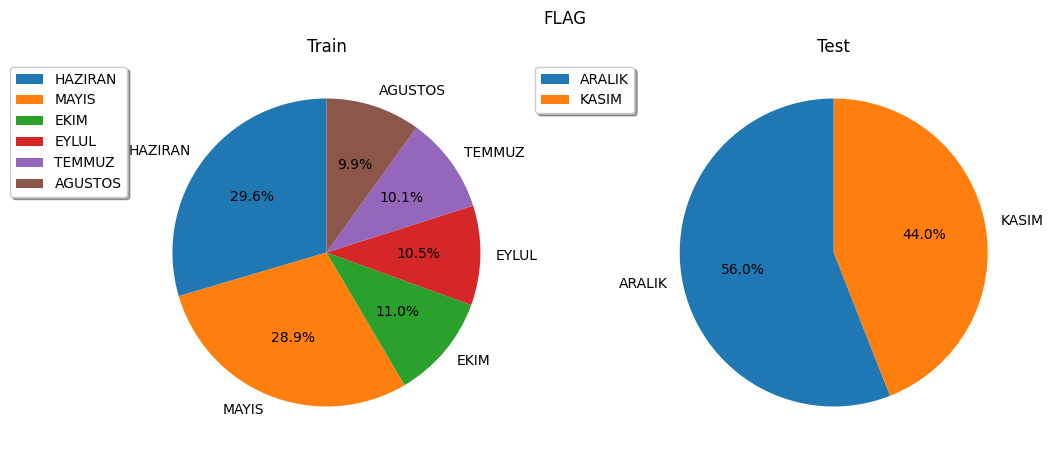

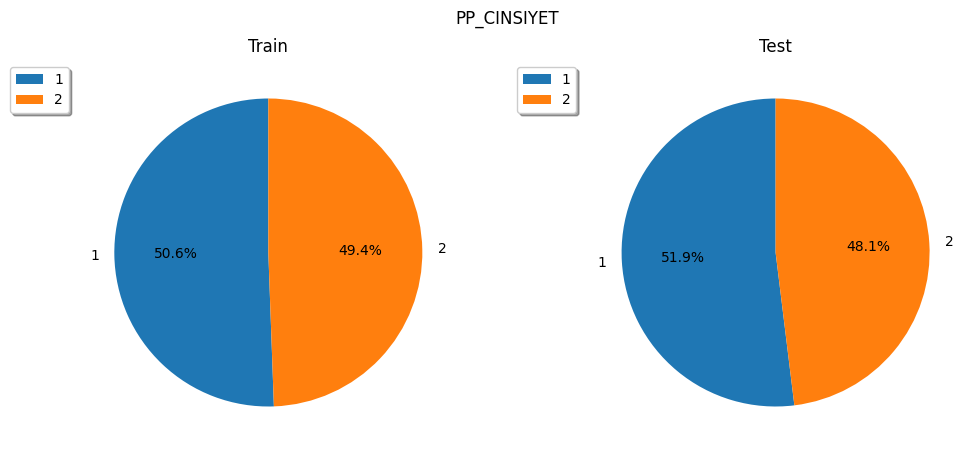

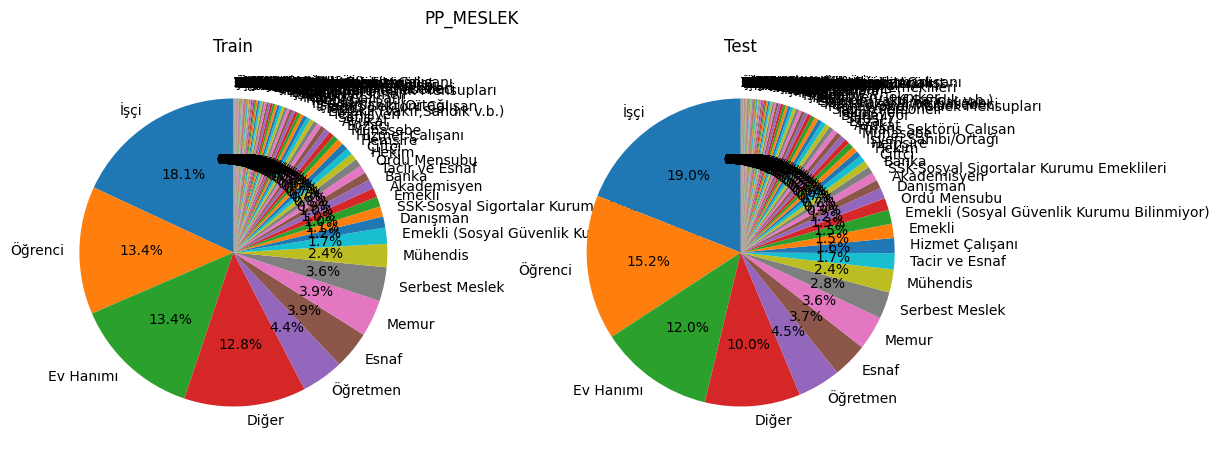

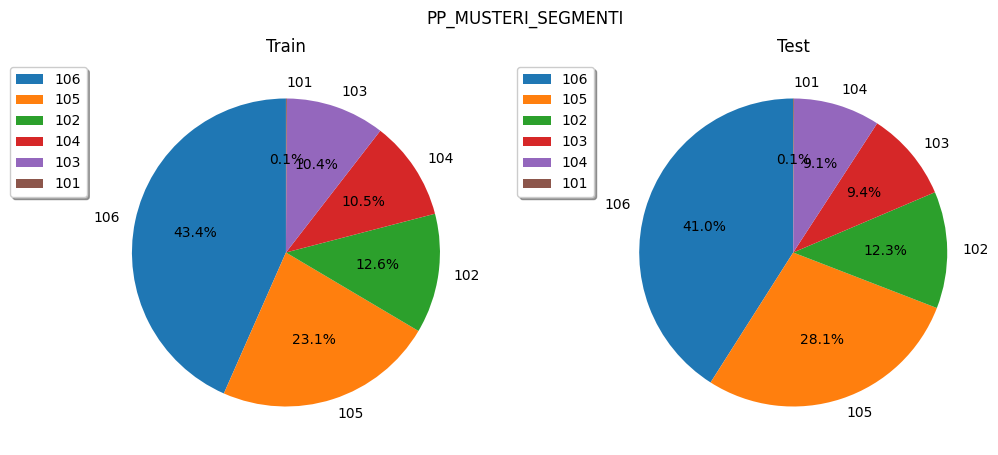

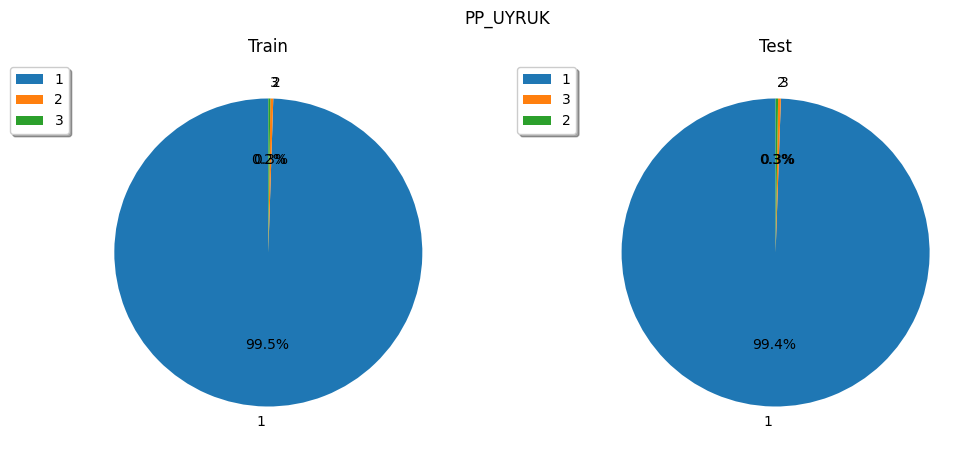

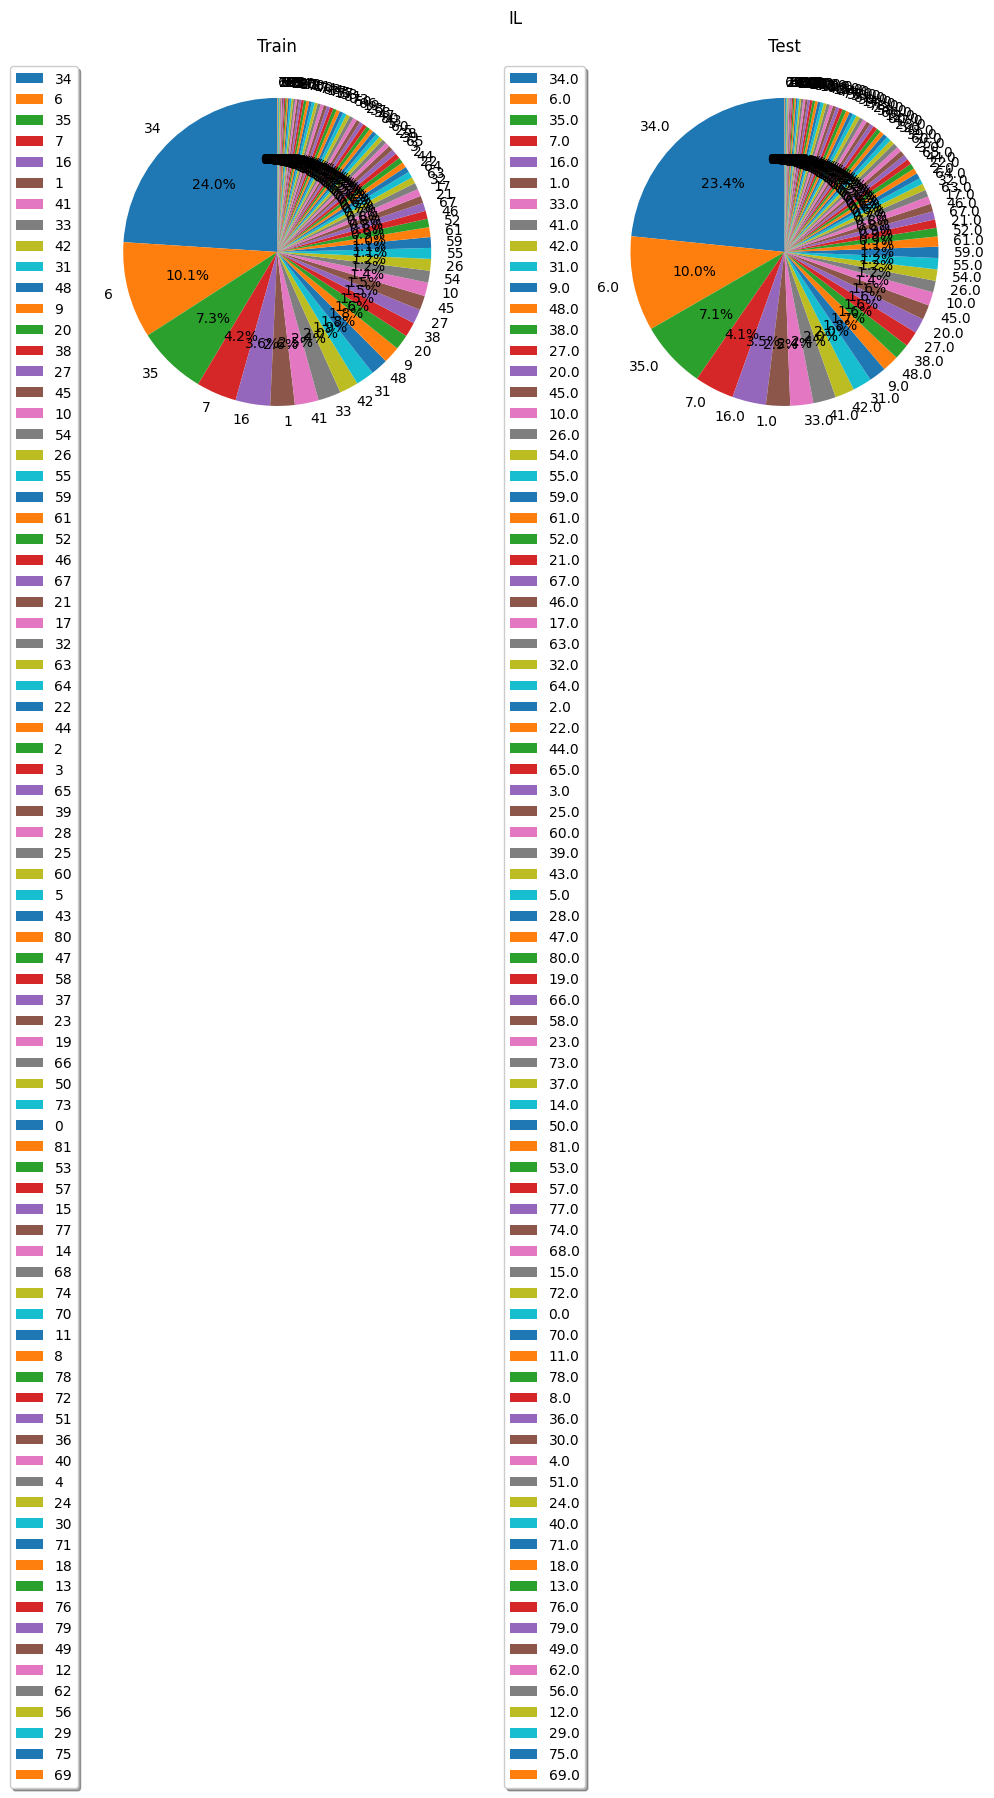

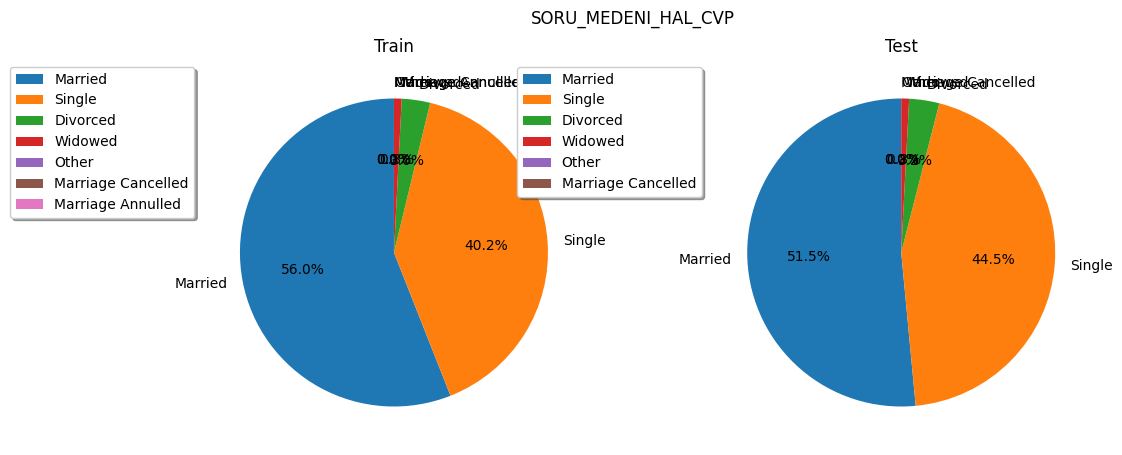

In [294]:
for i in cat:
    if(i == "MUSTERI_ID"):
        continue
    sizes = train[i].value_counts()
    labels = train[i].value_counts().index
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    if(i != "PP_MESLEK"):
        axes[0].legend(labels=labels,bbox_to_anchor=(0,1),shadow=True,numpoints=1)
    axes[0].set_title("Train")
   
    if(i != "LABEL"):
        sizes_test = test[i].value_counts()
        labels_test = test[i].value_counts().index
        axes[1].pie(sizes_test, labels=labels_test, autopct='%1.1f%%', startangle=90)
        if(i != "PP_MESLEK"):
            axes[1].legend(labels=labels_test,bbox_to_anchor=(0, 1),shadow=True,numpoints=1)
        axes[1].set_title("Test")
    

    plt.suptitle(i)
    plt.show()

In [276]:
train["SORU_GELIR_CVP"].value_counts()[:50]

SORU_GELIR_CVP
0          64686
2000       39534
5000       37957
3000       37357
1000       28669
10000      22694
0.0        22694
4000       19208
1500       15284
2500       14133
2000.0     13755
5000.0     13462
3000.0     13120
1000.0      9724
15000       9674
6000        8735
500         8481
10000.0     8317
20000       7970
7000        7780
3500        6797
4000.0      6729
8000        6208
1           5752
1500.0      5209
2500.0      4946
0.0         4191
15000.0     3867
6000.0      3153
20000.0     3111
30000       2982
500.0       2908
7000.0      2827
4500        2813
1200        2454
3500.0      2366
50000       2320
8000.0      2195
1.0         2041
25000       2027
100         1994
10000.0     1942
12000       1610
7500        1604
1800        1579
15000.0     1495
5000.0      1467
20000.0     1464
9000        1420
800         1306
Name: count, dtype: int64

In [273]:
train.shape

(852719, 99)

In [299]:
train.isna().sum(axis=1).value_counts()

10    289698
8     256154
12    153931
6      56177
13     31986
11     24715
15     15127
9      14790
4       3612
14      2803
7       1877
2       1364
0        354
5         88
3         26
17         7
16         6
1          4
Name: count, dtype: int64